# Aulia Rahim Nugrahani
https://www.linkedin.com/in/auliarnugrahani/

Mini Case by Rakamin Academy, Data Sciece 101

##Introduction
Sebuah perusahaan ritel online, dengan pelanggan yang sudah tersebar dari berbagai negara. Perusahaan memiliki data penjualan yang berisi semua transaksi yang terjadi di tahun 2009-2011. Perusahaan ingin tahu bagaimana performa penjualan dalam kurun waktu 3 tahun terakhir.

Section 1: Menganalisis Rata-Rata Pendapatan Per Tahun

Section 2: Menganalisis Transaksi Pelanggan Per Tahun




# Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 10, 5
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS/homework/Salinan online_retail_II.csv')

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB



*   Dataframe memiliki total 1067371 baris dan 8 kolom
*   Dataframe masih memiliki null values di kolom Description, dan Customer ID



In [ ]:
df.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
617701,544186,21171,BATHROOM METAL SIGN,1,2011-02-16 15:55:00,3.29,NaN,United Kingdom
560469,539434,22310,IVORY KNITTED MUG COSY,5,2010-12-17 14:41:00,3.36,NaN,United Kingdom
1029222,578935,23489,VINTAGE BELLS GARLAND,3,2011-11-27 12:52:00,2.89,15351.0,United Kingdom
555460,538839,21539,RED RETROSPOT BUTTER DISH,1,2010-12-14 13:10:00,4.95,14606.0,United Kingdom
696161,551340,21781,MA CAMPAGNE CUTLERY BOX,1,2011-04-27 17:23:00,29.13,NaN,United Kingdom
809843,561870,22300,COFFEE MUG DOG + BALL DESIGN,6,2011-07-31 11:45:00,2.55,14911.0,EIRE
304005,519024,21531,RED RETROSPOT SUGAR JAM BOWL,1,2010-08-13 09:22:00,5.06,NaN,United Kingdom
1052727,580697,21683,MEDIUM MEDINA STAMPED METAL BOWL,6,2011-12-05 16:05:00,2.95,15984.0,United Kingdom
133786,502093,84520B,PACK 20 ENGLISH ROSE PAPER NAPKINS,3,2010-03-22 17:32:00,0.85,16823.0,United Kingdom
464932,533301,21506,"FANCY FONT BIRTHDAY CARD,",12,2010-11-16 16:46:00,0.42,15811.0,United Kingdom


## Section 1

### Create New Feature: Year

In [ ]:
df['InvoiceDate'].astype('datetime64[ns]')

0         2009-12-01 07:45:00
1         2009-12-01 07:45:00
2         2009-12-01 07:45:00
3         2009-12-01 07:45:00
4         2009-12-01 07:45:00
                  ...        
1067366   2011-12-09 12:50:00
1067367   2011-12-09 12:50:00
1067368   2011-12-09 12:50:00
1067369   2011-12-09 12:50:00
1067370   2011-12-09 12:50:00
Name: InvoiceDate, Length: 1067371, dtype: datetime64[ns]

In [ ]:
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year

In [ ]:
df['Year']

0          2009
1          2009
2          2009
3          2009
4          2009
           ... 
1067366    2011
1067367    2011
1067368    2011
1067369    2011
1067370    2011
Name: Year, Length: 1067371, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
 8   Year         1067371 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 73.3+ MB


### Filtering Data

In [ ]:
df[df['Quantity']>=1]

NameError: ignored

In [ ]:
sales = df[(df['Quantity'] > 0) & (df['Invoice'].str.contains("C") == False)]

In [ ]:
sales

### Create New Feature: Revenue

In [ ]:
revenue = df['Quantity'] * df['Price']

In [ ]:
revenue.head()

0     83.4
1     81.0
2     81.0
3    100.8
4     30.0
dtype: float64

In [ ]:
df.insert(8,"Revenue",df['Quantity'] * df['Price'],True)

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011


### Average of Revenue per Year

In [ ]:
y= df.groupby(['Year'])['Revenue'].mean()

In [ ]:
y

Year
2009    17.684777
2010    18.152555
2011    18.018195
Name: Revenue, dtype: float64

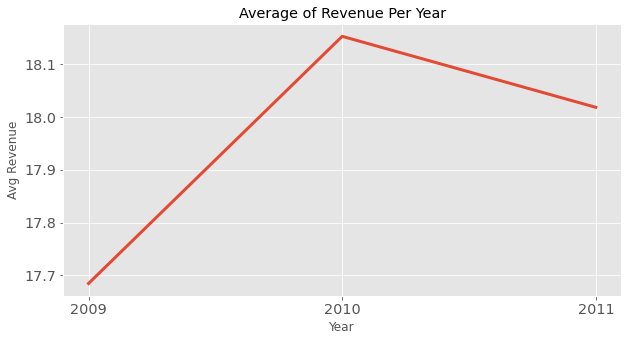

In [ ]:
x = df['Year'].unique() 
fig, ax=plt.subplots()
x = ['2009','2010', '2011']
plt.title('Average of Revenue Per Year')
plt.xlabel('Year')
plt.ylabel('Avg Revenue')
ax.plot(x,y)
plt.show()

In [ ]:
df.corr()

,Quantity,Price,Customer ID,Revenue,Year
Quantity,1.000000,-0.001319,-0.005430,0.762623,-0.000947
Price,-0.001319,1.000000,-0.003835,0.061029,-0.000948
Customer ID,-0.005430,-0.003835,1.000000,-0.003122,-0.031163
Revenue,0.762623,0.061029,-0.003122,1.000000,-0.000047
Year,-0.000947,-0.000948,-0.031163,-0.000047,1.000000


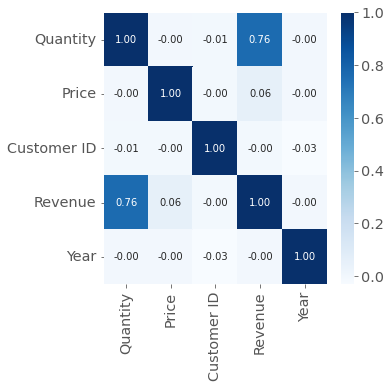

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),cmap='Blues',annot=True, fmt='.2f')

### Interpretation

Dalam 3 tahun terakhir, penjualan di perusahaan X menghasilkan rata-rata revenue terendah pada tahun 2009 kemudian mengalami kenaikan di tahun 2010 dan slightly turun di tahun 2011. 

Berdasarkan hasil uji korelasi, Revenue memiliki korelasi yang kuat terhadap Quantity. 

## Section 2

### Filtering Data 

#### Customers who finished their purchases

In [ ]:
finished = df.dropna(axis=0, subset=['Customer ID'])
finished

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


In [ ]:
finished['Customer ID'].isnull().sum()

0

In [ ]:
finished.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      824364 non-null  object 
 1   StockCode    824364 non-null  object 
 2   Description  824364 non-null  object 
 3   Quantity     824364 non-null  int64  
 4   InvoiceDate  824364 non-null  object 
 5   Price        824364 non-null  float64
 6   Customer ID  824364 non-null  float64
 7   Country      824364 non-null  object 
 8   Year         824364 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 62.9+ MB


In [ ]:
finished['InvoiceDate'].astype('datetime64[ns]')

0         2009-12-01 07:45:00
1         2009-12-01 07:45:00
2         2009-12-01 07:45:00
3         2009-12-01 07:45:00
4         2009-12-01 07:45:00
                  ...        
1067366   2011-12-09 12:50:00
1067367   2011-12-09 12:50:00
1067368   2011-12-09 12:50:00
1067369   2011-12-09 12:50:00
1067370   2011-12-09 12:50:00
Name: InvoiceDate, Length: 824364, dtype: datetime64[ns]

#### Customers who canceled their purchases

In [ ]:
canceled = df[df['Invoice'].str.contains("C") == True]
canceled

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011


In [ ]:
canceled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19494 entries, 178 to 1067178
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      19494 non-null  object 
 1   StockCode    19494 non-null  object 
 2   Description  19494 non-null  object 
 3   Quantity     19494 non-null  int64  
 4   InvoiceDate  19494 non-null  object 
 5   Price        19494 non-null  float64
 6   Customer ID  18744 non-null  float64
 7   Country      19494 non-null  object 
 8   Year         19494 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.5+ MB


In [ ]:
canceled['InvoiceDate'].astype('datetime64[ns]')

178       2009-12-01 10:33:00
179       2009-12-01 10:33:00
180       2009-12-01 10:33:00
181       2009-12-01 10:33:00
182       2009-12-01 10:33:00
                  ...        
1065910   2011-12-09 09:57:00
1067002   2011-12-09 10:28:00
1067176   2011-12-09 11:57:00
1067177   2011-12-09 11:58:00
1067178   2011-12-09 11:58:00
Name: InvoiceDate, Length: 19494, dtype: datetime64[ns]

### Number of Finished and Canceled Transactions Each Year

In [ ]:
finished['Year'] = pd.DatetimeIndex(finished['InvoiceDate']).year

In [ ]:
f = finished.groupby(['Year'])['Invoice'].count()
f

Year
2009     31760
2010    412624
2011    379980
Name: Invoice, dtype: int64

In [ ]:
canceled['Year'] = pd.DatetimeIndex(cancel['InvoiceDate']).year

In [ ]:
c = canceled.groupby(['Year'])['Invoice'].count()
c

Year
2009    1015
2010    9919
2011    8560
Name: Invoice, dtype: int64

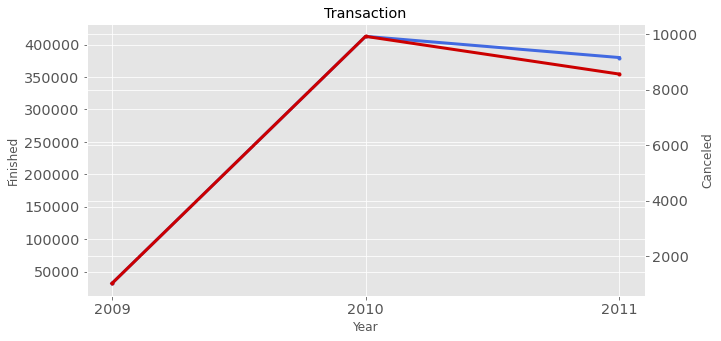

In [ ]:
fig, ax=plt.subplots()
x = ['2009','2010', '2011']
y = f.unique()
z = c.unique()
Line1 = ax.plot(x, y, marker='.', color='royalblue', label='Finished')
ax2 = ax.twinx()
Line2 = ax2.plot(x, z, marker='.', color='#cc0000', label='Cancel')
ax.set_title('Transaction')
ax.set_ylabel('Finished')
ax2.set_ylabel('Canceled')
ax.set_xlabel('Year')
plt.show()

### Cancellation Rate

In [ ]:
cr = cancel['Invoice'].count()/df['Invoice'].count()*100
cr

1.8263565339511754

In [ ]:
cancellation_rate = cancel.groupby(['Year'])['Invoice'].count()/df.groupby(['Year'])['Invoice'].count()*100
cancellation_rate

Year
2009    2.244185
2010    1.897596
2011    1.713957
Name: Invoice, dtype: float64

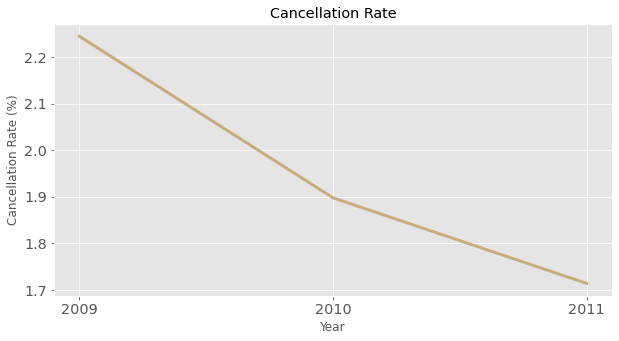

In [ ]:
y = cancellation_rate.unique()
fig, ax=plt.subplots()
x = ['2009','2010','2011']
plt.title('Cancellation Rate')
plt.xlabel('Year')
plt.ylabel('Cancellation Rate (%)')
ax.plot(x,y, color = '#C8AE7E')
plt.show()

### Interpretation

Jumlah transaksi yang terselesaikan di tahun 2009 sebanyak **31760**, kemudian naik 1199% di tahun 2010 dengan jumlah transaksi sebanyak **412624**. Slightly menurun di tahun 2011 dengan **379980** transaksi.

Di tahun 2009 merupakan tahun yang memilikin *cancellation reate* paling tinggi, yaitu **2,2%**, dengan jumlah transaksi yang batal sebanyak **1015**. Terjadi penurunan *cancellation rate* pada tahun 2010, yaitu **1,9%**, dengan jumlah transaksi yang batal **9919**. Meskipun dari tahun 2009 ke tahun 2010 jumlah transaksi yang batal meningkat, namun total transaksi yang terselesaikan juga meningkat. Di tahun 2011, jumlah transaksi yang batal menurun, yaitu **8650** transaksi dan diikutin dengan cancellation rate yang juga menurun menjadi **1,7%**.

Dalam kurun waktu 2009 hingga 2011, tingkat pembatalan transaksi terus menurun. Performa penjuaan terus membaik dibandingkan dengan yang terjadi pada tahun 2009.  

